Решения соревнования "Spaceship Titanic" с сайта Kaggle

https://www.kaggle.com/competitions/spaceship-titanic/overview

### 1. Устанавливаем необходимые билиотеки и загружаем данные

In [1]:
# Устанавливаем нужные библиотеки
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from nona.nona import nona

Описание файлов и полей данных

train.csv — личные записи примерно двух третей (примерно 8700) пассажиров, которые будут использоваться в качестве обучающих данных.


PassengerId- Уникальный идентификатор для каждого пассажира. Каждый идентификатор принимает форму gggg_pp, где ggggуказывает группу, с которой путешествует пассажир, и ppявляется их номером в группе. Люди в группе часто являются членами семьи, но не всегда.

HomePlanet- Планета, с которой вылетел пассажир, как правило, планета его постоянного проживания.

CryoSleep- Указывает, решил ли пассажир быть переведен в режим анабиоза на время рейса. Пассажиры, находящиеся в криосонном состоянии, находятся в своих каютах.

Cabin- Номер каюты, в которой находится пассажир. Принимает вид deck/num/side, где sideможет быть либо Pза левый , либо Sза правый борт .

Destination- Планета, на которую будет высаживаться пассажир.

Age- Возраст пассажира.

VIP- Оплатил ли пассажир специальное VIP-обслуживание во время рейса.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Сумма, которую пассажир выставил в счет за каждое из многочисленных роскошных удобств космического корабля Титаник .

Name- Имя и фамилия пассажира.

Transported- Был ли пассажир перенесён в другое измерение. Это цель, столбец, который вы пытаетесь предсказать.

test.csv — личные записи оставшейся трети (~ 4300) пассажиров, которые будут использоваться в качестве тестовых данных. Ваша задача состоит в том, чтобы предсказать значение Transportedдля пассажиров в этом наборе.


sample_submission.csv — файл отправки в правильном формате.

PassengerId- Id для каждого пассажира в тестовом наборе.

Transported- Цель. Для каждого пассажира предскажите либо True или False.

In [2]:
# Читаем данные
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### 2. Первичный анализ данных

In [3]:
# Получаем информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

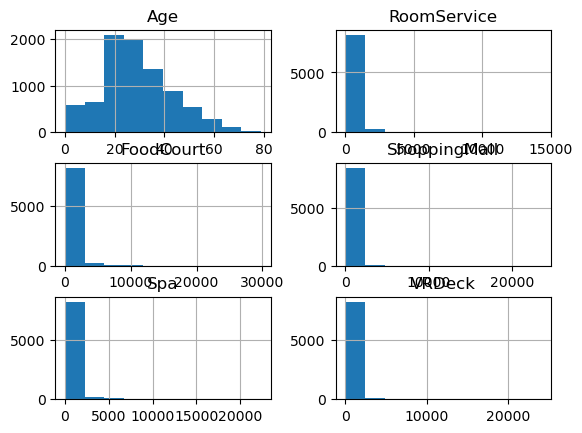

In [4]:
df.hist()

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Итог первичного анализа:

    1. Присутсвуют потерянные данные
    
    2. Есть признаки типа "object" с которыми нужно поработать.
    
    3. Есть данные, которые имеют хороший разброс в значениях

### 3. Начинаем приводить данные к удобному для моделей виду и заполнять пропущенные

In [6]:
df['Transported'] = df['Transported'].map({True:1, False:0})
df[['Group', 'Number']] = df['PassengerId'].str.split('_', 1, expand=True)
df = df.drop(['PassengerId'], axis=1)
df['CryoSleep'] = df['CryoSleep'].map({True:1, False:0})
df['VIP'] = df['VIP'].map({True:1, False:0})

In [7]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2})
df = df.drop(['Cabin'], axis=1)
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [9]:
df['Destination'] = df['Destination'].map({'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22':2})

In [10]:
df.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Group             0
Number            0
dtype: int64

In [11]:
df = df.drop('Name', axis=1)
df.shape

(8693, 13)

In [12]:
nona(df) # Используем для заполнения потерянных данных

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  5.68it/s]


In [13]:
df.isna().sum() # Проверяем наличие потерянных данных

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Group           0
Number          0
dtype: int64

In [14]:
df.dtypes # Проверяем тип данных

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
Group            object
Number           object
dtype: object

In [15]:
df['Group'] = df['Group'].astype (int)
df['Number'] = df['Number'].astype (int)
df.dtypes

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
Group             int32
Number            int32
dtype: object

Итог:
    
    1. Все данные имеют тип float или int, что необходимо для работы моделей
    2. В DataFrame отсутствуют потерянные данные
  

### 4. Разделение данных на тренировочные и валидационные. Обучение моделей XGBoost и RandomForest.

In [16]:
X = df.drop('Transported', axis=1)
y = df.Transported

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

##### Обучаем модель XGBoost

In [18]:
params = {'silent':False, 
                      'scale_pos_weight':1,
                      'learning_rate':0.01,  
                      'colsample_bytree': 0.4,
                      'subsample': 0.8,
                      'objective':'binary:logistic', 
                      'n_estimators':2000, 
                      'reg_alpha': 0.3,
                      'max_depth':4, 
                      'gamma':10}
clf_xgb = xgb.XGBClassifier(**params)

clf_xgb.fit(X_train, y_train, eval_metric='auc', eval_set=[[X_train, y_train], [X_val, y_val]])

best_params = params

[18:13:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-auc:0.67264	validation_1-auc:0.65823
[1]	validation_0-auc:0.77064	validation_1-auc:0.75773
[2]	validation_0-auc:0.81350	validation_1-auc:0.80129
[3]	validation_0-auc:0.82245	validation_1-auc:0.80882
[4]	validation_0-auc:0.83765	validation_1-auc:0.82863
[5]	validation_0-auc:0.83687	validation_1-auc:0.82895
[6]	validation_0-auc:0.83785	validation_1-auc:0.83038
[7]	validation_0-auc:0.84986	validation_1-auc:0.83882
[8]	validation_0-auc:0.85013	validation_1-auc:0.84014
[9]	validation_0-auc:0.84918	validation_1-auc:0.84058
[10]	validation_0-auc:0.85240	validation_1-auc:0.84276
[11]	validation_0-auc:0.85436	validation_1-auc:0.84425
[12]	validation_0-auc:0.85434	validation_1-auc:0.84375
[13]	validation_0-auc:0.85625	validation_1-auc:0.84567
[14]	validation_0-auc:0.85873	validation_1-a

[145]	validation_0-auc:0.87220	validation_1-auc:0.86121
[146]	validation_0-auc:0.87233	validation_1-auc:0.86139
[147]	validation_0-auc:0.87226	validation_1-auc:0.86134
[148]	validation_0-auc:0.87243	validation_1-auc:0.86152
[149]	validation_0-auc:0.87244	validation_1-auc:0.86154
[150]	validation_0-auc:0.87277	validation_1-auc:0.86177
[151]	validation_0-auc:0.87305	validation_1-auc:0.86194
[152]	validation_0-auc:0.87318	validation_1-auc:0.86202
[153]	validation_0-auc:0.87329	validation_1-auc:0.86218
[154]	validation_0-auc:0.87336	validation_1-auc:0.86223
[155]	validation_0-auc:0.87366	validation_1-auc:0.86234
[156]	validation_0-auc:0.87390	validation_1-auc:0.86243
[157]	validation_0-auc:0.87404	validation_1-auc:0.86243
[158]	validation_0-auc:0.87398	validation_1-auc:0.86239
[159]	validation_0-auc:0.87425	validation_1-auc:0.86262
[160]	validation_0-auc:0.87455	validation_1-auc:0.86287
[161]	validation_0-auc:0.87449	validation_1-auc:0.86290
[162]	validation_0-auc:0.87456	validation_1-auc:

[292]	validation_0-auc:0.88185	validation_1-auc:0.86864
[293]	validation_0-auc:0.88189	validation_1-auc:0.86862
[294]	validation_0-auc:0.88199	validation_1-auc:0.86867
[295]	validation_0-auc:0.88211	validation_1-auc:0.86875
[296]	validation_0-auc:0.88219	validation_1-auc:0.86880
[297]	validation_0-auc:0.88226	validation_1-auc:0.86883
[298]	validation_0-auc:0.88233	validation_1-auc:0.86891
[299]	validation_0-auc:0.88231	validation_1-auc:0.86885
[300]	validation_0-auc:0.88237	validation_1-auc:0.86890
[301]	validation_0-auc:0.88244	validation_1-auc:0.86892
[302]	validation_0-auc:0.88249	validation_1-auc:0.86894
[303]	validation_0-auc:0.88247	validation_1-auc:0.86895
[304]	validation_0-auc:0.88245	validation_1-auc:0.86895
[305]	validation_0-auc:0.88246	validation_1-auc:0.86896
[306]	validation_0-auc:0.88267	validation_1-auc:0.86911
[307]	validation_0-auc:0.88273	validation_1-auc:0.86914
[308]	validation_0-auc:0.88277	validation_1-auc:0.86911
[309]	validation_0-auc:0.88281	validation_1-auc:

[439]	validation_0-auc:0.88869	validation_1-auc:0.87374
[440]	validation_0-auc:0.88866	validation_1-auc:0.87372
[441]	validation_0-auc:0.88868	validation_1-auc:0.87375
[442]	validation_0-auc:0.88868	validation_1-auc:0.87376
[443]	validation_0-auc:0.88870	validation_1-auc:0.87378
[444]	validation_0-auc:0.88876	validation_1-auc:0.87383
[445]	validation_0-auc:0.88881	validation_1-auc:0.87389
[446]	validation_0-auc:0.88890	validation_1-auc:0.87398
[447]	validation_0-auc:0.88890	validation_1-auc:0.87399
[448]	validation_0-auc:0.88890	validation_1-auc:0.87399
[449]	validation_0-auc:0.88895	validation_1-auc:0.87405
[450]	validation_0-auc:0.88897	validation_1-auc:0.87407
[451]	validation_0-auc:0.88902	validation_1-auc:0.87407
[452]	validation_0-auc:0.88907	validation_1-auc:0.87412
[453]	validation_0-auc:0.88906	validation_1-auc:0.87412
[454]	validation_0-auc:0.88911	validation_1-auc:0.87416
[455]	validation_0-auc:0.88913	validation_1-auc:0.87419
[456]	validation_0-auc:0.88916	validation_1-auc:

[586]	validation_0-auc:0.89245	validation_1-auc:0.87683
[587]	validation_0-auc:0.89245	validation_1-auc:0.87682
[588]	validation_0-auc:0.89245	validation_1-auc:0.87683
[589]	validation_0-auc:0.89248	validation_1-auc:0.87683
[590]	validation_0-auc:0.89250	validation_1-auc:0.87685
[591]	validation_0-auc:0.89250	validation_1-auc:0.87683
[592]	validation_0-auc:0.89254	validation_1-auc:0.87688
[593]	validation_0-auc:0.89258	validation_1-auc:0.87690
[594]	validation_0-auc:0.89261	validation_1-auc:0.87693
[595]	validation_0-auc:0.89262	validation_1-auc:0.87694
[596]	validation_0-auc:0.89262	validation_1-auc:0.87693
[597]	validation_0-auc:0.89265	validation_1-auc:0.87695
[598]	validation_0-auc:0.89267	validation_1-auc:0.87697
[599]	validation_0-auc:0.89274	validation_1-auc:0.87700
[600]	validation_0-auc:0.89275	validation_1-auc:0.87704
[601]	validation_0-auc:0.89281	validation_1-auc:0.87706
[602]	validation_0-auc:0.89281	validation_1-auc:0.87706
[603]	validation_0-auc:0.89281	validation_1-auc:

[732]	validation_0-auc:0.89460	validation_1-auc:0.87806
[733]	validation_0-auc:0.89460	validation_1-auc:0.87806
[734]	validation_0-auc:0.89462	validation_1-auc:0.87807
[735]	validation_0-auc:0.89462	validation_1-auc:0.87808
[736]	validation_0-auc:0.89464	validation_1-auc:0.87809
[737]	validation_0-auc:0.89464	validation_1-auc:0.87809
[738]	validation_0-auc:0.89466	validation_1-auc:0.87805
[739]	validation_0-auc:0.89468	validation_1-auc:0.87807
[740]	validation_0-auc:0.89470	validation_1-auc:0.87808
[741]	validation_0-auc:0.89470	validation_1-auc:0.87803
[742]	validation_0-auc:0.89472	validation_1-auc:0.87805
[743]	validation_0-auc:0.89472	validation_1-auc:0.87805
[744]	validation_0-auc:0.89471	validation_1-auc:0.87804
[745]	validation_0-auc:0.89471	validation_1-auc:0.87804
[746]	validation_0-auc:0.89473	validation_1-auc:0.87806
[747]	validation_0-auc:0.89476	validation_1-auc:0.87810
[748]	validation_0-auc:0.89478	validation_1-auc:0.87810
[749]	validation_0-auc:0.89478	validation_1-auc:

[879]	validation_0-auc:0.89586	validation_1-auc:0.87873
[880]	validation_0-auc:0.89586	validation_1-auc:0.87873
[881]	validation_0-auc:0.89586	validation_1-auc:0.87873
[882]	validation_0-auc:0.89588	validation_1-auc:0.87874
[883]	validation_0-auc:0.89588	validation_1-auc:0.87873
[884]	validation_0-auc:0.89588	validation_1-auc:0.87874
[885]	validation_0-auc:0.89588	validation_1-auc:0.87874
[886]	validation_0-auc:0.89589	validation_1-auc:0.87875
[887]	validation_0-auc:0.89589	validation_1-auc:0.87875
[888]	validation_0-auc:0.89589	validation_1-auc:0.87875
[889]	validation_0-auc:0.89589	validation_1-auc:0.87875
[890]	validation_0-auc:0.89589	validation_1-auc:0.87875
[891]	validation_0-auc:0.89592	validation_1-auc:0.87873
[892]	validation_0-auc:0.89595	validation_1-auc:0.87875
[893]	validation_0-auc:0.89595	validation_1-auc:0.87875
[894]	validation_0-auc:0.89595	validation_1-auc:0.87875
[895]	validation_0-auc:0.89595	validation_1-auc:0.87875
[896]	validation_0-auc:0.89595	validation_1-auc:

[1025]	validation_0-auc:0.89668	validation_1-auc:0.87927
[1026]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1027]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1028]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1029]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1030]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1031]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1032]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1033]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1034]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1035]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1036]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1037]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1038]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1039]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1040]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1041]	validation_0-auc:0.89672	validation_1-auc:0.87928
[1042]	validation_0-auc:0.89672

[1169]	validation_0-auc:0.89715	validation_1-auc:0.87959
[1170]	validation_0-auc:0.89715	validation_1-auc:0.87959
[1171]	validation_0-auc:0.89715	validation_1-auc:0.87959
[1172]	validation_0-auc:0.89715	validation_1-auc:0.87959
[1173]	validation_0-auc:0.89715	validation_1-auc:0.87959
[1174]	validation_0-auc:0.89715	validation_1-auc:0.87959
[1175]	validation_0-auc:0.89717	validation_1-auc:0.87960
[1176]	validation_0-auc:0.89717	validation_1-auc:0.87960
[1177]	validation_0-auc:0.89717	validation_1-auc:0.87960
[1178]	validation_0-auc:0.89717	validation_1-auc:0.87960
[1179]	validation_0-auc:0.89718	validation_1-auc:0.87960
[1180]	validation_0-auc:0.89718	validation_1-auc:0.87960
[1181]	validation_0-auc:0.89718	validation_1-auc:0.87960
[1182]	validation_0-auc:0.89718	validation_1-auc:0.87960
[1183]	validation_0-auc:0.89718	validation_1-auc:0.87960
[1184]	validation_0-auc:0.89718	validation_1-auc:0.87960
[1185]	validation_0-auc:0.89719	validation_1-auc:0.87959
[1186]	validation_0-auc:0.89721

[1313]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1314]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1315]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1316]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1317]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1318]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1319]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1320]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1321]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1322]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1323]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1324]	validation_0-auc:0.89752	validation_1-auc:0.87984
[1325]	validation_0-auc:0.89753	validation_1-auc:0.87987
[1326]	validation_0-auc:0.89753	validation_1-auc:0.87987
[1327]	validation_0-auc:0.89753	validation_1-auc:0.87987
[1328]	validation_0-auc:0.89753	validation_1-auc:0.87987
[1329]	validation_0-auc:0.89753	validation_1-auc:0.87987
[1330]	validation_0-auc:0.89753

[1457]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1458]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1459]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1460]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1461]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1462]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1463]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1464]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1465]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1466]	validation_0-auc:0.89771	validation_1-auc:0.87999
[1467]	validation_0-auc:0.89771	validation_1-auc:0.88000
[1468]	validation_0-auc:0.89771	validation_1-auc:0.87995
[1469]	validation_0-auc:0.89773	validation_1-auc:0.87997
[1470]	validation_0-auc:0.89773	validation_1-auc:0.87997
[1471]	validation_0-auc:0.89773	validation_1-auc:0.87997
[1472]	validation_0-auc:0.89773	validation_1-auc:0.87997
[1473]	validation_0-auc:0.89773	validation_1-auc:0.87997
[1474]	validation_0-auc:0.89773

[1601]	validation_0-auc:0.89794	validation_1-auc:0.88008
[1602]	validation_0-auc:0.89794	validation_1-auc:0.88008
[1603]	validation_0-auc:0.89794	validation_1-auc:0.88008
[1604]	validation_0-auc:0.89794	validation_1-auc:0.88008
[1605]	validation_0-auc:0.89794	validation_1-auc:0.88008
[1606]	validation_0-auc:0.89798	validation_1-auc:0.88009
[1607]	validation_0-auc:0.89798	validation_1-auc:0.88009
[1608]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1609]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1610]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1611]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1612]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1613]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1614]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1615]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1616]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1617]	validation_0-auc:0.89800	validation_1-auc:0.88010
[1618]	validation_0-auc:0.89800

[1745]	validation_0-auc:0.89808	validation_1-auc:0.88018
[1746]	validation_0-auc:0.89808	validation_1-auc:0.88018
[1747]	validation_0-auc:0.89808	validation_1-auc:0.88018
[1748]	validation_0-auc:0.89808	validation_1-auc:0.88018
[1749]	validation_0-auc:0.89808	validation_1-auc:0.88018
[1750]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1751]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1752]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1753]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1754]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1755]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1756]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1757]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1758]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1759]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1760]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1761]	validation_0-auc:0.89811	validation_1-auc:0.88019
[1762]	validation_0-auc:0.89811

[1889]	validation_0-auc:0.89829	validation_1-auc:0.88043
[1890]	validation_0-auc:0.89829	validation_1-auc:0.88043
[1891]	validation_0-auc:0.89829	validation_1-auc:0.88043
[1892]	validation_0-auc:0.89829	validation_1-auc:0.88043
[1893]	validation_0-auc:0.89829	validation_1-auc:0.88043
[1894]	validation_0-auc:0.89829	validation_1-auc:0.88043
[1895]	validation_0-auc:0.89829	validation_1-auc:0.88043
[1896]	validation_0-auc:0.89829	validation_1-auc:0.88043
[1897]	validation_0-auc:0.89829	validation_1-auc:0.88043
[1898]	validation_0-auc:0.89832	validation_1-auc:0.88046
[1899]	validation_0-auc:0.89832	validation_1-auc:0.88046
[1900]	validation_0-auc:0.89835	validation_1-auc:0.88048
[1901]	validation_0-auc:0.89835	validation_1-auc:0.88048
[1902]	validation_0-auc:0.89835	validation_1-auc:0.88048
[1903]	validation_0-auc:0.89835	validation_1-auc:0.88048
[1904]	validation_0-auc:0.89835	validation_1-auc:0.88048
[1905]	validation_0-auc:0.89835	validation_1-auc:0.88048
[1906]	validation_0-auc:0.89835

In [19]:
# Функция для подбора параметров
def find_params(clf, param_grid):
    clf = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=[(np.arange(len(X_train)),
                                                               np.arange(len(X_val)) + len(X_train))],
                  verbose=3)

    clf.fit(pd.concat([X_train, X_val]).values, pd.concat([y_train, y_val]).values)
    best_params = clf.best_estimator_.get_params()
    print('Best test ROC AUC: ', clf.best_score_)
    print('Best params: ', best_params)
    return best_params

In [20]:
clf_xgb = xgb.XGBClassifier(**best_params)

param_grid = {
    'gamma': np.linspace(0, 0.5, 5)
}

best_params = find_params(clf_xgb, param_grid)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
[18:13:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .........................gamma=0.0;, score=0.887 total time=   7.2s
[18:14:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .......................gamma=0.125;, score=0.888 total time=   7.3s
[18:14:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END ........................gamma=0.25;, score=0.888 total time=   7.1s
[18:14:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xg

In [21]:
clf_xgb = xgb.XGBClassifier(**best_params)

param_grid = {
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6)
}

best_params = find_params(clf_xgb, param_grid)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
[18:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END colsample_bytree=0.5, subsample=0.5;, score=0.887 total time=   7.5s
[18:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END colsample_bytree=0.5, subsample=0.6;, score=0.887 total time=   7.7s
[18:15:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END colsample_bytree=0.5, subsample=0.7;, score=0.887 total time=   7.9s
[18:15:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f

[CV 1/1] END colsample_bytree=0.9, subsample=1.0;, score=0.886 total time=   7.4s
[18:18:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END colsample_bytree=1.0, subsample=0.5;, score=0.885 total time=   9.2s
[18:18:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END colsample_bytree=1.0, subsample=0.6;, score=0.886 total time=   9.9s
[18:19:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END colsample_bytree=1.0, subsample=0.7;, score=0.887 total time=  10.2s
[18:19:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-grou

In [22]:
clf_xgb = xgb.XGBClassifier(**best_params)

param_grid = {
    'reg_alpha': [0, 0.00001, 0.0001, 0.001, 0.1, 1],
    'reg_lambda': [0, 0.00001, 0.0001, 0.001, 0.1, 1]
}

best_params = find_params(clf_xgb, param_grid)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
[18:19:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .........reg_alpha=0, reg_lambda=0;, score=0.889 total time=   8.3s
[18:20:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .....reg_alpha=0, reg_lambda=1e-05;, score=0.889 total time=   8.6s
[18:20:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END ....reg_alpha=0, reg_lambda=0.0001;, score=0.889 total time=   8.6s
[18:20:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/

[CV 1/1] END .......reg_alpha=0.1, reg_lambda=1;, score=0.888 total time=   8.8s
[18:24:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .........reg_alpha=1, reg_lambda=0;, score=0.888 total time=   9.1s
[18:24:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .....reg_alpha=1, reg_lambda=1e-05;, score=0.888 total time=   8.2s
[18:24:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END ....reg_alpha=1, reg_lambda=0.0001;, score=0.888 total time=   8.7s
[18:24:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-

In [23]:
clf_xgb = xgb.XGBClassifier(**best_params)

param_grid = {
    'reg_alpha': [0, 0.00001, 0.0001, 0.001, 0.1, 1],
    'reg_lambda': [0, 0.00001, 0.0001, 0.001, 0.1, 1]
}

best_params = find_params(clf_xgb, param_grid)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
[18:25:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .........reg_alpha=0, reg_lambda=0;, score=0.889 total time=   8.8s
[18:25:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .....reg_alpha=0, reg_lambda=1e-05;, score=0.889 total time=   8.5s
[18:25:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END ....reg_alpha=0, reg_lambda=0.0001;, score=0.889 total time=   8.4s
[18:25:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/

[CV 1/1] END .......reg_alpha=0.1, reg_lambda=1;, score=0.888 total time=   7.6s
[18:29:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .........reg_alpha=1, reg_lambda=0;, score=0.888 total time=   8.2s
[18:29:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END .....reg_alpha=1, reg_lambda=1e-05;, score=0.888 total time=   7.7s
[18:29:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV 1/1] END ....reg_alpha=1, reg_lambda=0.0001;, score=0.888 total time=   8.8s
[18:29:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-

In [24]:
clf_xgb = xgb.XGBClassifier(**best_params)

clf_xgb.fit(X_train, y_train, eval_metric='auc', eval_set=[[X_train, y_train], [X_val, y_val]])

[18:30:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-auc:0.84063	validation_1-auc:0.81835
[1]	validation_0-auc:0.86530	validation_1-auc:0.84796
[2]	validation_0-auc:0.87298	validation_1-auc:0.85815
[3]	validation_0-auc:0.87354	validation_1-auc:0.85950
[4]	validation_0-auc:0.87337	validation_1-auc:0.85944
[5]	validation_0-auc:0.87263	validation_1-auc:0.85676
[6]	validation_0-auc:0.87392	validation_1-auc:0.85665
[7]	validation_0-auc:0.87628	validation_1-auc:0.85915
[8]	validation_0-auc:0.87690	validation_1-auc:0.86070
[9]	validation_0-auc:0.87681	validation_1-auc:0.86002
[10]	validation_0-auc:0.87793	validation_1-auc:0.86140
[11]	validation_0-auc:0.87771	validation_1-auc:0.86184
[12]	validation_0-auc:0.87746	validation_1-auc:0.86153
[13]	validation_0-auc:0.87821	validation_1-auc:0.86223
[14]	validation_0-auc:0.87907	validation_1-a

[145]	validation_0-auc:0.89422	validation_1-auc:0.87379
[146]	validation_0-auc:0.89424	validation_1-auc:0.87384
[147]	validation_0-auc:0.89433	validation_1-auc:0.87395
[148]	validation_0-auc:0.89442	validation_1-auc:0.87402
[149]	validation_0-auc:0.89456	validation_1-auc:0.87405
[150]	validation_0-auc:0.89463	validation_1-auc:0.87404
[151]	validation_0-auc:0.89492	validation_1-auc:0.87434
[152]	validation_0-auc:0.89500	validation_1-auc:0.87443
[153]	validation_0-auc:0.89512	validation_1-auc:0.87438
[154]	validation_0-auc:0.89512	validation_1-auc:0.87432
[155]	validation_0-auc:0.89522	validation_1-auc:0.87451
[156]	validation_0-auc:0.89538	validation_1-auc:0.87456
[157]	validation_0-auc:0.89547	validation_1-auc:0.87457
[158]	validation_0-auc:0.89556	validation_1-auc:0.87473
[159]	validation_0-auc:0.89561	validation_1-auc:0.87486
[160]	validation_0-auc:0.89561	validation_1-auc:0.87490
[161]	validation_0-auc:0.89572	validation_1-auc:0.87499
[162]	validation_0-auc:0.89574	validation_1-auc:

[292]	validation_0-auc:0.90459	validation_1-auc:0.87963
[293]	validation_0-auc:0.90467	validation_1-auc:0.87968
[294]	validation_0-auc:0.90473	validation_1-auc:0.87969
[295]	validation_0-auc:0.90473	validation_1-auc:0.87971
[296]	validation_0-auc:0.90480	validation_1-auc:0.87973
[297]	validation_0-auc:0.90482	validation_1-auc:0.87978
[298]	validation_0-auc:0.90489	validation_1-auc:0.87984
[299]	validation_0-auc:0.90493	validation_1-auc:0.87985
[300]	validation_0-auc:0.90498	validation_1-auc:0.87985
[301]	validation_0-auc:0.90503	validation_1-auc:0.87985
[302]	validation_0-auc:0.90506	validation_1-auc:0.87986
[303]	validation_0-auc:0.90511	validation_1-auc:0.87989
[304]	validation_0-auc:0.90514	validation_1-auc:0.87993
[305]	validation_0-auc:0.90517	validation_1-auc:0.87993
[306]	validation_0-auc:0.90521	validation_1-auc:0.87998
[307]	validation_0-auc:0.90532	validation_1-auc:0.88006
[308]	validation_0-auc:0.90540	validation_1-auc:0.88013
[309]	validation_0-auc:0.90544	validation_1-auc:

[439]	validation_0-auc:0.91125	validation_1-auc:0.88333
[440]	validation_0-auc:0.91127	validation_1-auc:0.88334
[441]	validation_0-auc:0.91128	validation_1-auc:0.88335
[442]	validation_0-auc:0.91131	validation_1-auc:0.88336
[443]	validation_0-auc:0.91139	validation_1-auc:0.88345
[444]	validation_0-auc:0.91141	validation_1-auc:0.88349
[445]	validation_0-auc:0.91144	validation_1-auc:0.88350
[446]	validation_0-auc:0.91147	validation_1-auc:0.88355
[447]	validation_0-auc:0.91150	validation_1-auc:0.88357
[448]	validation_0-auc:0.91154	validation_1-auc:0.88361
[449]	validation_0-auc:0.91162	validation_1-auc:0.88362
[450]	validation_0-auc:0.91164	validation_1-auc:0.88367
[451]	validation_0-auc:0.91167	validation_1-auc:0.88367
[452]	validation_0-auc:0.91168	validation_1-auc:0.88369
[453]	validation_0-auc:0.91171	validation_1-auc:0.88373
[454]	validation_0-auc:0.91177	validation_1-auc:0.88378
[455]	validation_0-auc:0.91180	validation_1-auc:0.88379
[456]	validation_0-auc:0.91184	validation_1-auc:

[586]	validation_0-auc:0.91610	validation_1-auc:0.88570
[587]	validation_0-auc:0.91618	validation_1-auc:0.88574
[588]	validation_0-auc:0.91619	validation_1-auc:0.88576
[589]	validation_0-auc:0.91623	validation_1-auc:0.88579
[590]	validation_0-auc:0.91628	validation_1-auc:0.88580
[591]	validation_0-auc:0.91630	validation_1-auc:0.88582
[592]	validation_0-auc:0.91631	validation_1-auc:0.88582
[593]	validation_0-auc:0.91633	validation_1-auc:0.88582
[594]	validation_0-auc:0.91638	validation_1-auc:0.88584
[595]	validation_0-auc:0.91639	validation_1-auc:0.88584
[596]	validation_0-auc:0.91644	validation_1-auc:0.88584
[597]	validation_0-auc:0.91645	validation_1-auc:0.88584
[598]	validation_0-auc:0.91646	validation_1-auc:0.88587
[599]	validation_0-auc:0.91652	validation_1-auc:0.88585
[600]	validation_0-auc:0.91654	validation_1-auc:0.88582
[601]	validation_0-auc:0.91656	validation_1-auc:0.88582
[602]	validation_0-auc:0.91660	validation_1-auc:0.88585
[603]	validation_0-auc:0.91666	validation_1-auc:

[733]	validation_0-auc:0.92021	validation_1-auc:0.88698
[734]	validation_0-auc:0.92022	validation_1-auc:0.88698
[735]	validation_0-auc:0.92023	validation_1-auc:0.88699
[736]	validation_0-auc:0.92026	validation_1-auc:0.88699
[737]	validation_0-auc:0.92032	validation_1-auc:0.88702
[738]	validation_0-auc:0.92036	validation_1-auc:0.88703
[739]	validation_0-auc:0.92042	validation_1-auc:0.88706
[740]	validation_0-auc:0.92043	validation_1-auc:0.88706
[741]	validation_0-auc:0.92043	validation_1-auc:0.88706
[742]	validation_0-auc:0.92046	validation_1-auc:0.88712
[743]	validation_0-auc:0.92054	validation_1-auc:0.88715
[744]	validation_0-auc:0.92061	validation_1-auc:0.88714
[745]	validation_0-auc:0.92065	validation_1-auc:0.88716
[746]	validation_0-auc:0.92066	validation_1-auc:0.88718
[747]	validation_0-auc:0.92070	validation_1-auc:0.88721
[748]	validation_0-auc:0.92071	validation_1-auc:0.88722
[749]	validation_0-auc:0.92073	validation_1-auc:0.88724
[750]	validation_0-auc:0.92078	validation_1-auc:

[880]	validation_0-auc:0.92431	validation_1-auc:0.88814
[881]	validation_0-auc:0.92432	validation_1-auc:0.88815
[882]	validation_0-auc:0.92432	validation_1-auc:0.88816
[883]	validation_0-auc:0.92434	validation_1-auc:0.88817
[884]	validation_0-auc:0.92436	validation_1-auc:0.88817
[885]	validation_0-auc:0.92439	validation_1-auc:0.88817
[886]	validation_0-auc:0.92443	validation_1-auc:0.88819
[887]	validation_0-auc:0.92446	validation_1-auc:0.88818
[888]	validation_0-auc:0.92447	validation_1-auc:0.88820
[889]	validation_0-auc:0.92450	validation_1-auc:0.88821
[890]	validation_0-auc:0.92451	validation_1-auc:0.88821
[891]	validation_0-auc:0.92453	validation_1-auc:0.88820
[892]	validation_0-auc:0.92454	validation_1-auc:0.88820
[893]	validation_0-auc:0.92456	validation_1-auc:0.88822
[894]	validation_0-auc:0.92457	validation_1-auc:0.88824
[895]	validation_0-auc:0.92458	validation_1-auc:0.88823
[896]	validation_0-auc:0.92459	validation_1-auc:0.88825
[897]	validation_0-auc:0.92460	validation_1-auc:

[1026]	validation_0-auc:0.92773	validation_1-auc:0.88901
[1027]	validation_0-auc:0.92777	validation_1-auc:0.88904
[1028]	validation_0-auc:0.92784	validation_1-auc:0.88901
[1029]	validation_0-auc:0.92786	validation_1-auc:0.88902
[1030]	validation_0-auc:0.92786	validation_1-auc:0.88901
[1031]	validation_0-auc:0.92789	validation_1-auc:0.88903
[1032]	validation_0-auc:0.92791	validation_1-auc:0.88903
[1033]	validation_0-auc:0.92791	validation_1-auc:0.88904
[1034]	validation_0-auc:0.92797	validation_1-auc:0.88904
[1035]	validation_0-auc:0.92801	validation_1-auc:0.88903
[1036]	validation_0-auc:0.92801	validation_1-auc:0.88902
[1037]	validation_0-auc:0.92805	validation_1-auc:0.88902
[1038]	validation_0-auc:0.92805	validation_1-auc:0.88903
[1039]	validation_0-auc:0.92808	validation_1-auc:0.88905
[1040]	validation_0-auc:0.92811	validation_1-auc:0.88905
[1041]	validation_0-auc:0.92812	validation_1-auc:0.88905
[1042]	validation_0-auc:0.92815	validation_1-auc:0.88904
[1043]	validation_0-auc:0.92815

[1170]	validation_0-auc:0.93100	validation_1-auc:0.88923
[1171]	validation_0-auc:0.93101	validation_1-auc:0.88924
[1172]	validation_0-auc:0.93103	validation_1-auc:0.88924
[1173]	validation_0-auc:0.93108	validation_1-auc:0.88923
[1174]	validation_0-auc:0.93111	validation_1-auc:0.88924
[1175]	validation_0-auc:0.93111	validation_1-auc:0.88924
[1176]	validation_0-auc:0.93112	validation_1-auc:0.88925
[1177]	validation_0-auc:0.93115	validation_1-auc:0.88926
[1178]	validation_0-auc:0.93116	validation_1-auc:0.88926
[1179]	validation_0-auc:0.93118	validation_1-auc:0.88927
[1180]	validation_0-auc:0.93120	validation_1-auc:0.88928
[1181]	validation_0-auc:0.93120	validation_1-auc:0.88928
[1182]	validation_0-auc:0.93122	validation_1-auc:0.88930
[1183]	validation_0-auc:0.93123	validation_1-auc:0.88929
[1184]	validation_0-auc:0.93124	validation_1-auc:0.88929
[1185]	validation_0-auc:0.93124	validation_1-auc:0.88930
[1186]	validation_0-auc:0.93127	validation_1-auc:0.88926
[1187]	validation_0-auc:0.93129

[1314]	validation_0-auc:0.93382	validation_1-auc:0.88944
[1315]	validation_0-auc:0.93386	validation_1-auc:0.88944
[1316]	validation_0-auc:0.93388	validation_1-auc:0.88945
[1317]	validation_0-auc:0.93392	validation_1-auc:0.88945
[1318]	validation_0-auc:0.93395	validation_1-auc:0.88948
[1319]	validation_0-auc:0.93396	validation_1-auc:0.88949
[1320]	validation_0-auc:0.93396	validation_1-auc:0.88950
[1321]	validation_0-auc:0.93400	validation_1-auc:0.88953
[1322]	validation_0-auc:0.93403	validation_1-auc:0.88951
[1323]	validation_0-auc:0.93405	validation_1-auc:0.88951
[1324]	validation_0-auc:0.93406	validation_1-auc:0.88953
[1325]	validation_0-auc:0.93408	validation_1-auc:0.88949
[1326]	validation_0-auc:0.93411	validation_1-auc:0.88951
[1327]	validation_0-auc:0.93413	validation_1-auc:0.88950
[1328]	validation_0-auc:0.93413	validation_1-auc:0.88951
[1329]	validation_0-auc:0.93414	validation_1-auc:0.88950
[1330]	validation_0-auc:0.93419	validation_1-auc:0.88947
[1331]	validation_0-auc:0.93422

[1458]	validation_0-auc:0.93691	validation_1-auc:0.88942
[1459]	validation_0-auc:0.93694	validation_1-auc:0.88943
[1460]	validation_0-auc:0.93695	validation_1-auc:0.88945
[1461]	validation_0-auc:0.93698	validation_1-auc:0.88948
[1462]	validation_0-auc:0.93702	validation_1-auc:0.88948
[1463]	validation_0-auc:0.93703	validation_1-auc:0.88948
[1464]	validation_0-auc:0.93706	validation_1-auc:0.88949
[1465]	validation_0-auc:0.93706	validation_1-auc:0.88949
[1466]	validation_0-auc:0.93709	validation_1-auc:0.88950
[1467]	validation_0-auc:0.93712	validation_1-auc:0.88949
[1468]	validation_0-auc:0.93715	validation_1-auc:0.88948
[1469]	validation_0-auc:0.93715	validation_1-auc:0.88946
[1470]	validation_0-auc:0.93718	validation_1-auc:0.88947
[1471]	validation_0-auc:0.93720	validation_1-auc:0.88947
[1472]	validation_0-auc:0.93723	validation_1-auc:0.88946
[1473]	validation_0-auc:0.93723	validation_1-auc:0.88946
[1474]	validation_0-auc:0.93725	validation_1-auc:0.88946
[1475]	validation_0-auc:0.93728

[1602]	validation_0-auc:0.93965	validation_1-auc:0.88949
[1603]	validation_0-auc:0.93965	validation_1-auc:0.88949
[1604]	validation_0-auc:0.93967	validation_1-auc:0.88950
[1605]	validation_0-auc:0.93969	validation_1-auc:0.88950
[1606]	validation_0-auc:0.93972	validation_1-auc:0.88950
[1607]	validation_0-auc:0.93975	validation_1-auc:0.88953
[1608]	validation_0-auc:0.93976	validation_1-auc:0.88952
[1609]	validation_0-auc:0.93977	validation_1-auc:0.88951
[1610]	validation_0-auc:0.93979	validation_1-auc:0.88951
[1611]	validation_0-auc:0.93980	validation_1-auc:0.88951
[1612]	validation_0-auc:0.93983	validation_1-auc:0.88954
[1613]	validation_0-auc:0.93985	validation_1-auc:0.88955
[1614]	validation_0-auc:0.93988	validation_1-auc:0.88953
[1615]	validation_0-auc:0.93989	validation_1-auc:0.88952
[1616]	validation_0-auc:0.93992	validation_1-auc:0.88952
[1617]	validation_0-auc:0.93993	validation_1-auc:0.88953
[1618]	validation_0-auc:0.93995	validation_1-auc:0.88952
[1619]	validation_0-auc:0.93996

[1746]	validation_0-auc:0.94221	validation_1-auc:0.88928
[1747]	validation_0-auc:0.94224	validation_1-auc:0.88924
[1748]	validation_0-auc:0.94226	validation_1-auc:0.88925
[1749]	validation_0-auc:0.94228	validation_1-auc:0.88927
[1750]	validation_0-auc:0.94232	validation_1-auc:0.88931
[1751]	validation_0-auc:0.94236	validation_1-auc:0.88931
[1752]	validation_0-auc:0.94237	validation_1-auc:0.88932
[1753]	validation_0-auc:0.94237	validation_1-auc:0.88932
[1754]	validation_0-auc:0.94238	validation_1-auc:0.88932
[1755]	validation_0-auc:0.94238	validation_1-auc:0.88931
[1756]	validation_0-auc:0.94239	validation_1-auc:0.88930
[1757]	validation_0-auc:0.94241	validation_1-auc:0.88932
[1758]	validation_0-auc:0.94242	validation_1-auc:0.88931
[1759]	validation_0-auc:0.94244	validation_1-auc:0.88932
[1760]	validation_0-auc:0.94246	validation_1-auc:0.88931
[1761]	validation_0-auc:0.94248	validation_1-auc:0.88932
[1762]	validation_0-auc:0.94251	validation_1-auc:0.88932
[1763]	validation_0-auc:0.94252

[1890]	validation_0-auc:0.94489	validation_1-auc:0.88913
[1891]	validation_0-auc:0.94490	validation_1-auc:0.88915
[1892]	validation_0-auc:0.94493	validation_1-auc:0.88913
[1893]	validation_0-auc:0.94494	validation_1-auc:0.88913
[1894]	validation_0-auc:0.94495	validation_1-auc:0.88915
[1895]	validation_0-auc:0.94499	validation_1-auc:0.88916
[1896]	validation_0-auc:0.94499	validation_1-auc:0.88916
[1897]	validation_0-auc:0.94502	validation_1-auc:0.88916
[1898]	validation_0-auc:0.94503	validation_1-auc:0.88916
[1899]	validation_0-auc:0.94505	validation_1-auc:0.88916
[1900]	validation_0-auc:0.94507	validation_1-auc:0.88917
[1901]	validation_0-auc:0.94509	validation_1-auc:0.88917
[1902]	validation_0-auc:0.94513	validation_1-auc:0.88922
[1903]	validation_0-auc:0.94513	validation_1-auc:0.88923
[1904]	validation_0-auc:0.94516	validation_1-auc:0.88922
[1905]	validation_0-auc:0.94518	validation_1-auc:0.88921
[1906]	validation_0-auc:0.94520	validation_1-auc:0.88922
[1907]	validation_0-auc:0.94522

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.375, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### Обучение модели RandomForest

In [25]:
cv_rf = 7
random_state_global = 10

In [26]:
%%time
X_train = df.drop(['Transported'], axis=1)
y_train = df.Transported
param_grid = {
    'n_estimators': range(10, 1001, 10),
    'max_depth': range(1, 150),
    'min_samples_split': range(2, 201),
    'min_samples_leaf': range(2, 201),
    'criterion': ['gini', 'entropy']
    
}
rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=random_state_global), param_distributions=param_grid,
                        n_iter=10, cv=cv_rf,  n_jobs=-1)
rf.fit(X_train, y_train)

Wall time: 1min 44s


RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 150),
                                        'min_samples_leaf': range(2, 201),
                                        'min_samples_split': range(2, 201),
                                        'n_estimators': range(10, 1001, 10)})

In [27]:
best_rf = rf.best_estimator_
print(best_rf)

RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_leaf=17,
                       n_estimators=550, random_state=10)


In [28]:
independent_columns_names = [x for x in df if x != "Transported"]
independent_columns_names[
    np.argmin(rf.best_estimator_.feature_importances_)
]
pd.DataFrame(
    {
        "feat": independent_columns_names,
        "coef": rf.best_estimator_.feature_importances_,
    }
).sort_values(by="coef", ascending=False)

,feat,coef
1,CryoSleep,0.188813
8,Spa,0.158593
5,RoomService,0.138764
9,VRDeck,0.129247
6,FoodCourt,0.099874
0,HomePlanet,0.093053
7,ShoppingMall,0.074403
3,Age,0.049154
10,Group,0.046781
2,Destination,0.014218


In [29]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_leaf=17,
                       n_estimators=550, random_state=10)

In [30]:
y_pred = best_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.8260718020216103

Итог:
    
    1. XGBoost модель обучена с точностью на валидационных данных = 0.88914
    2. RandomForest модель обучена с точностью на валидационных данных = 0.82607
    
Выводы: XGBoost модель показала себя лучше на валидационных данных.

### 5. Делаем предсказания на тестовых данных и закидываем в Kaggle соревнование

In [31]:
df = pd.read_csv('test.csv')

In [32]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


##### Предобрабатываем данные

In [33]:
df[['Group', 'Number']] = df['PassengerId'].str.split('_', 1, expand=True)
df = df.drop(['PassengerId'], axis=1)
df['CryoSleep'] = df['CryoSleep'].map({True:1, False:0})
df['VIP'] = df['VIP'].map({True:1, False:0})
df['HomePlanet'] = df['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2})
df= df.drop(['Cabin'], axis=1)
df['Destination'] = df['Destination'].map({'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22':2})
df['Group'] = df['Group'].astype (int)
df['Number'] = df['Number'].astype (int)
df['VIP'] = df['VIP'].fillna(0)
df = df.drop(['Name'], axis=1)
nona(df)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 11.35it/s]


In [34]:
df.shape

(4277, 12)

In [35]:
test_pred = best_rf.predict(df)
test_pred = test_pred.astype('bool')
sub = pd.read_csv('sample_submission.csv')
output = pd.DataFrame({'PassengerId':sub.PassengerId, 'Transported':test_pred})
output.to_csv('submission_rf.csv', index=False)

In [36]:
test_pred = clf_xgb.predict(df)
test_pred = test_pred.astype('bool')
sub = pd.read_csv('sample_submission.csv')
output = pd.DataFrame({'PassengerId':sub.PassengerId, 'Transported':test_pred})
output.to_csv('submission_xboost.csv', index=False)

Итог:

    1. XGBoost модель обучена с точностью на тестовых данных = 0.79097
    2. RandomForest модель обучена с точностью на тестовых данных = 0.7905
    
Выводы: XGBoost модель показала себя чуть лучше на тренировочных данных, но модель RandomForest оказалась лучше в соотношение точность_модели/время_на_обучение